#**Problems Chapter 5**
## **Problem 5.1**
Show that the logistic sigmoid function $sig[z]$ maps $z = −∞$ to $0$, $z = 0$ to $0.5$
and $z = ∞$ to $1$ where:
\begin{align}
sig[z] = \frac{1}{1+\exp[-z]}
\end{align}
###**Answer**
\begin{align}
\lim_{z \to -\infty} sig[z] = \lim_{z \to -\infty} \frac{1}{1+\exp[-z]} = \frac{1}{1+\infty}=0\\
\lim_{z \to \infty} sig[z] = \lim_{z \to \infty} \frac{1}{1+\exp[-z]} = \frac{1}{1+0}=1\\
sig[0] =  \frac{1}{1+\exp[0]} = \frac{1}{1+1} = 0.5
\end{align}

## **Problem 5.2**
The loss $L$ for binary classification for a single training pair $\{x, y\}$ is:

\begin{align}
L  = -(1-y)\log\left[ 1 -sig[f[x,\phi]] \right] - y \log\left[sig[f[x,\phi]] \right]
\end{align}

where $sig[•]$ is defined in equation 5.32. Plot this loss as a function of the transformed network output $sig[f[x,\phi]] \in [0, 1]$ (i) when the training label $y = 0$ and (ii) when $y = 1$.
###**Answer**



####Graph

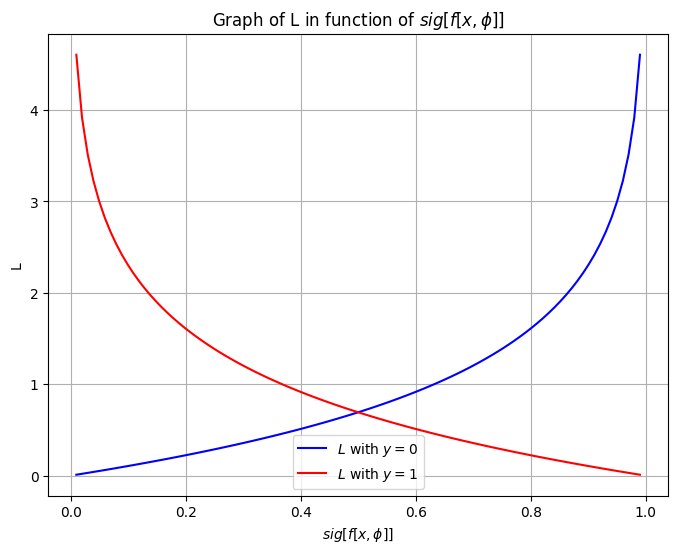

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de x
x = np.linspace(0.01, 0.99, 100)

# Calcular los valores de y para ambas funciones
z1 = -np.log(1-x) #y=0
z2 = -np.log(x) #y=1

# Crear la gráfica
plt.figure(figsize=(8, 6))

# Graficar y = x^2
plt.plot(x, z1, label='$L$ with $y = 0$', color='blue')

# Graficar y = x^2 + 1
plt.plot(x, z2, label='$L$ with $y = 1$', color='red')

# Etiquetas de los ejes y título
plt.xlabel('$sig[f[x,\phi]]$')
plt.ylabel('L')
plt.title('Graph of L in function of $sig[f[x,\phi]]$')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


## **Problem 5.3**
Suppose we want to build a model that predicts the direction y in radians of the
prevailing wind based on local measurements of barometric pressure x. A suitable distribution over circular domains is the von Mises distribution (figure 5.13):
\begin{align}
Pr(y|\mu,κ) = \frac{\exp[κ \cos[y-\mu]]}{2\pi \cdot \mathrm{Bessel}_0 [κ]}
\end{align}
where $\mu$ is a measure of the mean direction and κ is a measure of the concentration (i.e., the inverse of the variance). The term $\mathrm{Bessel}_0[κ]$ is a modified Bessel function of order 0. Use the recipe from section 5.2 to develop a loss function for learning the parameter $\mu$ of a model $f[x, \phi]$ to predict the most likely wind direction. Your solution should treat the concentration κ as constant. How would you perform inference?
###**Answer**
Using the recipe for creating a loss function for the von Misses distribution determinated by parameter $\mu = f[x, \mathbf{ϕ}]$, lead us to use minimize the negative log likelihood to finding the parameters $\hat{\mathbf{ϕ}}$ that minimize the loss:
\begin{align}
\hat{\mathbf{ϕ}} = \underset{\mathbf{ϕ}}{\mathrm{argmin}}[L[\mathbf{ϕ}]] = \underset{\mathbf{ϕ}}{\mathrm{argmin}}\left[ -\sum_{i=1}^{I} \log \left[ Pr(y_i | f[x_i,\mathbf{ϕ}]) \right] \right]\\
= \underset{\mathbf{ϕ}}{\mathrm{argmin}}\left[ -\sum_{i=1}^{I} \log \left[ \frac{\exp[κ \cos[y_i-f[x_i,\mathbf{ϕ}]]]}{2\pi \cdot \mathrm{Bessel}_0 [κ]} \right]\right]\\
= \underset{\mathbf{ϕ}}{\mathrm{argmin}}\left[ -\sum_{i=1}^{I} \log \left[ \exp[κ \cos[y_i-f[x_i,\mathbf{ϕ}]]] \right] +\sum_{i=1}^{I} \log \left[ 2\pi \cdot \mathrm{Bessel}_0 [κ] \right] \right]\\
= \underset{\mathbf{ϕ}}{\mathrm{argmin}}\left[ -\sum_{i=1}^{I} κ \cos[y_i-f[x_i,\mathbf{ϕ}]] \right]\\
= \underset{\mathbf{ϕ}}{\mathrm{argmin}}\left[ -\sum_{i=1}^{I}\cos[y_i-f[x_i,\mathbf{ϕ}]] \right]\\
L[\mathbf{ϕ}] = \ -\sum_{i=1}^{I}\cos[y_i-f[x_i,\mathbf{ϕ}]] \\
\end{align}

Performing inference can be done by returning the full distribution $\frac{\exp[κ \cos[y-f[x,\mathbf{ϕ}]]]}{2\pi \cdot \mathrm{Bessel}_0 [κ]}$, or returning the mean $μ = f[x,\mathbf{ϕ}]$

##**Problem 5.4**
Sometimes, the outputs $y$ for input $x$ are multimodal (figure 5.14a); there is
more than one valid prediction for a given input. Here, we might use a weighted sum of normal components as the distribution over the output. This is known as a mixture of Gaussians model. For example, a mixture of two Gaussians has parameters $θ = \{λ, µ_1, σ_{21}, µ_2, σ_{22}\}$:
\begin{align}
Pr(y|λ, µ_1, σ^2_1, µ_2, σ^2_2) = \frac{λ}{\sqrt{2\pi σ^2_1}}\exp \left[ \frac{-(y-μ_1)^2}{2 σ^2_1}\right] + \frac{1-λ}{\sqrt{2\pi σ^2_2}}\exp \left[\frac{-(y-μ_2)^2}{2 σ^2_2}\right]
\end{align}
where λ ∈ [0, 1] controls the relative weight of the two components, which have means $µ_1, µ_2$ and variances $σ_{21}, σ_{22}$, respectively. This model can represent a distribution with two peaks (figure 5.14b) or a distribution with one peak but a more complex shape (figure 5.14c). Use the recipe from section 5.2 to construct a loss function for training a model $f[x, \mathbf{ϕ}]$ that takes input $x$, has parameters $\mathbf{ϕ}$, and predicts a mixture of two Gaussians. The loss should be based on I training data pairs $\{x_i, y_i\}$. What problems do you foresee when performing inference?
###**Answer**
\begin{align}
L = -\sum_{i=1}^I \log \left[ \frac{sig[f_1[x, \mathbf{ϕ}]]}{\sqrt{2\pi f_3[x, \mathbf{ϕ}]^2}}\exp \left[ \frac{-(y-f_2[x, \mathbf{ϕ}])^2}{2 f_3[x, \mathbf{ϕ}]^2}\right] + \frac{1-sig[f_1[x, \mathbf{ϕ}]]}{\sqrt{2\pi f_5[x, \mathbf{ϕ}]^2}}\exp \left[\frac{-(y-f_3[x, \mathbf{ϕ}])^2}{2 f_5[x, \mathbf{ϕ}]^2}\right] \right]
\end{align}

When doing inference we should optimize the distribution function to obtain the best prediction with the highest probability.

##**Problem 5.5**
Consider extending the model from problem 5.3 to predict the wind direction using a mixture of two von Mises distributions. Write an expression for the likelihood $Pr(y|θ)$ for this model. How many outputs will the network need to produce?
###**Answer**
\begin{align}
Pr(y|λ,\mu_1,κ_1,\mu_2,κ_2) = λ \frac{\exp[κ_1 \cos[y-\mu_1]]}{2\pi \cdot \mathrm{Bessel}_0 [κ_1]} + (1-λ) \frac{\exp[κ_2 \cos[y-\mu_2]]}{2\pi \cdot \mathrm{Bessel}_0 [κ_2]}
\end{align}

A network with five outputs will be required.

##**Problem 5.6**
###**Answer**
In this case the parameter $λ>0$ is represented by $e^{f[x_i,\mathbf{ϕ}]}$ where ${f[x_i,\mathbf{ϕ}]}$ is the output of a neural network with one output. We use this exponential function because $\lambda$ is required to be positive.

\begin{align}
L[\mathbf{ϕ}] = -\sum_{i=1}^I \log \left[ \frac{\left(e^{f[x_i,\mathbf{ϕ}]}\right)^{y_i} e^{-e^{f[x_i,\mathbf{ϕ}]}}}{y_i !} \right]\\
= -\sum_{i=1}^I \log \left[ \frac{e^{y_i \cdot f[x_i,\mathbf{ϕ}]} e^{-e^{f[x_i,\mathbf{ϕ}]}}}{y_i !} \right]\\
= -\sum_{i=1}^I \log \left[ \frac{e^{y_i \cdot f[x_i,\mathbf{ϕ}]-e^{f[x_i,\mathbf{ϕ}]}}}{y_i !} \right]\\
= -\sum_{i=1}^I y_i \cdot f[x_i,\mathbf{ϕ}]-e^{f[x_i,\mathbf{ϕ}]}- \log[y_i !]\\
\end{align}

##**Problem 5.7**
###**Answer 1**
\begin{align}
Pr(\mathbf{y}|\mathbf{f}[\mathbf{x},\mathbf{ϕ}]) = \prod_{d=1}^{10} \frac{1}{\sqrt{2\pi σ^2}}\exp \left[ \frac{-(y_d-f_d[\mathbf{x}, \mathbf{ϕ}])^2}{2 σ^2}\right]
\end{align}
###**Answer 2**
\begin{align}
\hat{\mathbf{ϕ}} = \underset{\mathbf{ϕ}}{\mathrm{argmin}}[L[\mathbf{ϕ}]] = \underset{\mathbf{ϕ}}{\mathrm{argmin}}\left[ -\sum_{i=1}^{I} \log \left[ Pr(\mathbf{y}_i|\mathbf{f}[\mathbf{x}_i,\mathbf{ϕ}]) \right] \right]\\
= \underset{\mathbf{ϕ}}{\mathrm{argmin}}\left[ -\sum_{i=1}^{I} \log \left[ \prod_{d=1}^{10} \frac{1}{\sqrt{2\pi σ^2}}\exp \left[ \frac{-({y_i}_d-f_d[\mathbf{x}_i, \mathbf{ϕ}])^2}{2 σ^2}\right] \right]\right]\\
= \underset{\mathbf{ϕ}}{\mathrm{argmin}}\left[ -\sum_{i=1}^{I}  \sum_{d=1}^{10} \log \left[\frac{1}{\sqrt{2\pi σ^2}}\exp \left[ \frac{-({y_i}_d-f_d[\mathbf{x}_i, \mathbf{ϕ}])^2}{2 σ^2}\right] \right]\right]\\
= \underset{\mathbf{ϕ}}{\mathrm{argmin}}\left[ -\sum_{i=1}^{I}  \sum_{d=1}^{10} \log \left[\frac{1}{\sqrt{2\pi σ^2}}\right] + \log \left[\exp \left[ -({y_i}_d-f_d[\mathbf{x}_i, \mathbf{ϕ}])^2\right] \right] - \log \left[2 σ^2 \right]\right]\\
= \underset{\mathbf{ϕ}}{\mathrm{argmin}}\left[ -\sum_{i=1}^{I}  \sum_{d=1}^{10} \log \left[\exp \left[ -({y_i}_d-f_d[\mathbf{x}_i, \mathbf{ϕ}])^2\right] \right] \right]\\
= \underset{\mathbf{ϕ}}{\mathrm{argmin}}\left[ -\sum_{i=1}^{I}  \sum_{d=1}^{10} -({y_i}_d-f_d[\mathbf{x}_i, \mathbf{ϕ}])^2 \right]\\
= \underset{\mathbf{ϕ}}{\mathrm{argmin}}\left[ \sum_{i=1}^{I}  \sum_{d=1}^{10}({y_i}_d-f_d[\mathbf{x}_i, \mathbf{ϕ}])^2 \right]
\end{align}
##**Problem 5.8**
###**Answer**
\begin{align}
L[\mathbf{ϕ}] =-\sum_{i=1}^{I}  \sum_{d=1}^{D_i} \log \left[\frac{1}{\sqrt{2\pi {f_2}_d[\mathbf{x}_i, \mathbf{ϕ}]^2}}\exp \left[ \frac{-({y_i}_d-{f_1}_d[\mathbf{x}_i, \mathbf{ϕ}])^2}{2 {f_2}_d[\mathbf{x}_i, \mathbf{ϕ}]^2}\right] \right]
\end{align}
##**Problem 5.9**
###**Answer**
The height in meters use to have values between 0 and 2.5 meters, and the weight use to have values between 0 and 700 kilograms. For example, if we calculate the loss, is it possible that a small difference between predicted and real weight values contributes more to increase the loss function output than a a big difference between predicted and real height values. But that will ocurre if we use homoscedastic regression, wich means that all data point has the same uncertainty. We can solve this problem if we use heteroscedastic regression, where each data point may have different uncertainty, meaning that the variance, for example, will change per data point, perhaps increasing the variance for weight and decreasing it for height in general.
##**Problem 5.10**
###**Answer**
Velocity and direction proability distribution can be determined by a normal distribution and a Von Mises distribution, respectively, resulting in a multivariate probability distribution:
\begin{align}
Pr(\mathbf{y}|σ^2,\mu_1,κ,\mu_2) = \frac{1}{\sqrt{2\pi σ^2}}\exp \left[ \frac{-(y_1-\mu_1)^2}{2 σ^2}\right] \cdot \frac{\exp[κ \cos[y_2-\mu_2]]}{2\pi \cdot \mathrm{Bessel}_0 [κ]}
\end{align}
Here, $\mathbf{y} = (y_1,y_2)$ with $y_1$ represeting the velocity predicted by a normal distribution determined by the variance $\sigma^2$ and the mean $\mu_1$. The direction is represented by $y_2$, and predicted by a Von Mises distribution with variance $κ>0$ and mean $\mu_2$. Creating a heteroscedastic model, we use a neural network with four outputs. Where  $\sigma = f_1[x,\mathbf{ϕ}],\ \mu_1=f_2[x,\mathbf{ϕ}],\ κ=e^{f_3[x,\mathbf{ϕ}]},\ \mu_2 = f_4[x,\mathbf{ϕ}]$. This yields:

\begin{align}
Pr(\mathbf{y}|\mathbf{ϕ}) = \frac{1}{\sqrt{2\pi f_1[x,\mathbf{ϕ}]^2}}\exp \left[ \frac{-(y_1-f_2[x,\mathbf{ϕ}])^2}{2 f_1[x,\mathbf{ϕ}]^2}\right] \cdot \frac{\exp[e^{f_3[x,\mathbf{ϕ}]} \cos[y_2-f_4[x,\mathbf{ϕ}]]]}{2\pi \cdot \mathrm{Bessel}_0 [e^{f_3[x,\mathbf{ϕ}]}]}
\end{align}

Thus, the loss function is given by:

\begin{align}
L[\mathbf{ϕ}] = -\sum_{i=1}^I \log \left[ \frac{1}{\sqrt{2\pi f_1[x,\mathbf{ϕ}]^2}}\exp \left[ \frac{-(y_1-f_2[x,\mathbf{ϕ}])^2}{2 f_1[x,\mathbf{ϕ}]^2}\right] \cdot \frac{\exp[e^{f_3[x,\mathbf{ϕ}]} \cos[y_2-f_4[x,\mathbf{ϕ}]]]}{2\pi \cdot \mathrm{Bessel}_0 [e^{f_3[x,\mathbf{ϕ}]}]} \right]
\end{align}

